# Airline passenger satisfaction - EDA

## About the Data

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger?

    - Gender: Gender of the passengers (Female, Male)
    - Customer Type: The customer type (Loyal customer, disloyal customer)
    - Age: The actual age of the passengers
    - Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
    - Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
    - Flight distance: The flight distance of this journey
    - Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
    - Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
    - Ease of Online booking: Satisfaction level of online booking
    - Gate location: Satisfaction level of Gate location
    - Food and drink: Satisfaction level of Food and drink
    - Online boarding: Satisfaction level of online boarding
    - Seat comfort: Satisfaction level of Seat comfort
    - Inflight entertainment: Satisfaction level of inflight entertainment
    - On-board service: Satisfaction level of On-board service
    - Leg room service: Satisfaction level of Leg room service
    - Baggage handling: Satisfaction level of baggage handling
    - Check-in service: Satisfaction level of Check-in service
    - Inflight service: Satisfaction level of inflight service
    - Cleanliness: Satisfaction level of Cleanliness
    - Departure Delay in Minutes: Minutes delayed when departure
    - Arrival Delay in Minutes: Minutes delayed when Arrival
    - Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)
Note that this data set was modified from this dataset by John D here. It has been cleaned up for the purposes of classification.

# Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
test = pd.read_csv("Resources/test.csv")
train= pd.read_csv("Resources/train.csv")

In [3]:
test.shape

(25976, 25)

In [4]:
train.shape

(103904, 25)

In [5]:
all_df = pd.concat([test,train], axis=0)
all_df.drop(columns='Unnamed: 0', inplace=True)
all_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [7]:
all_df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [8]:
all_df.drop(columns=['id'], inplace=True)

# Explore Data and Visualization

## Overall number of satisfaction

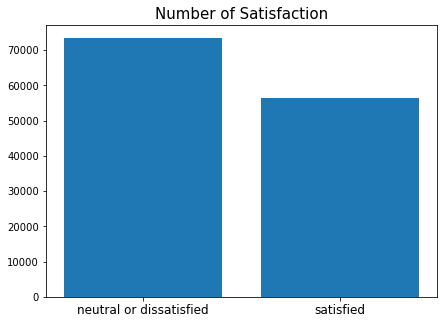

In [9]:
# Number of satisfied people and neutral or dissatisfied people
satis_value_counts = pd.DataFrame(all_df.satisfaction.value_counts())

plt.figure(figsize=(7,5))
plt.bar(x = satis_value_counts.index, height=satis_value_counts.satisfaction)
plt.title('Number of Satisfaction', fontsize=15)
plt.xticks(fontsize=12)
plt.show()

## Departure Delay in Minutes 

Is there strong relationship between Departure Delay and Customer satisfaction?

In [10]:
# Separate the dataset one with more than 60 minutes/one with less than 30 minutes delay
more_than_60 = all_df[all_df['Departure Delay in Minutes'] > 60]
less_than_30 = all_df[all_df['Departure Delay in Minutes'] < 30]

In [11]:
more_than_60 = more_than_60['satisfaction'].value_counts()
less_than_30 = less_than_30['satisfaction'].value_counts()

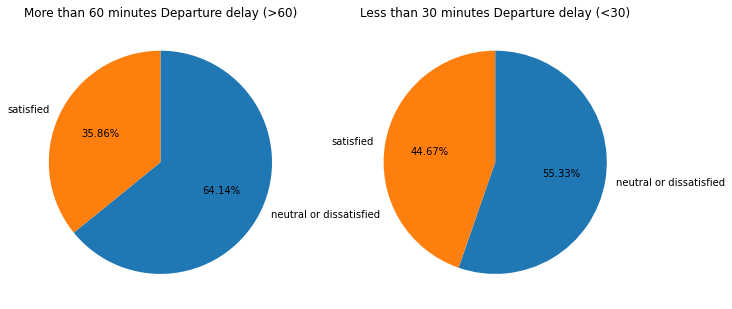

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(11,11)

labels = ['neutral or dissatisfied', 'satisfied']

ax1.pie(more_than_60, labels=labels, autopct='%1.2f%%', startangle=90, counterclock=False)
ax1.set_title("More than 60 minutes Departure delay (>60)")

ax2.pie(less_than_30, labels=labels, autopct='%1.2f%%', startangle=90, counterclock=False)
ax2.set_title("Less than 30 minutes Departure delay (<30)")

plt.show()

## Distribution of Customer's age

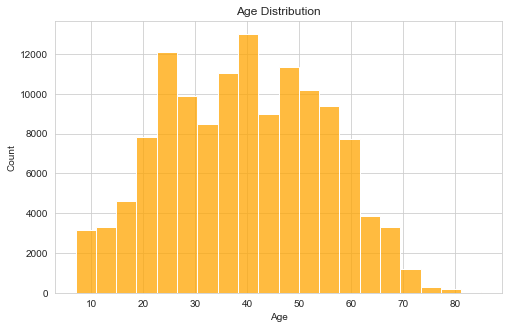

In [13]:
# Plot Histogram of Customer's age
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.histplot(all_df['Age'],bins=20, color='orange')
plt.title('Age Distribution')
plt.show()  

## Customer satisfaction by Age group

We will create age groups so that we can analyze data by thier age.

In [14]:
# Crage Age groups in new column (Under20, 20s, 30s, 40s, 50s,60s,70s, and 80s)
age_group = []

for i in all_df['Age']:
    if i > 0 and i < 20:
        i = 'Under 20'
        age_group.append(i)
   
    elif i >= 20 and i < 30:
        i = '20s'
        age_group.append(i)
    
    elif i >= 30 and i < 40:
        i = '30s'
        age_group.append(i)
        
    elif i >= 40 and i < 50:
        i = '40s'
        age_group.append(i)
        
    elif i >= 50 and i < 60:
        i = '50s'
        age_group.append(i)
    
    elif i >= 60 and i < 70:
        i = '60s'
        age_group.append(i)
        
    elif i >= 70 and i < 80:
        i = '70s'
        age_group.append(i)
        
    elif i >= 80 and i < 90:
        i = '80s'
        age_group.append(i)

In [15]:
all_df['Age Group'] = age_group

In [16]:
age_group_satisfaction_count = all_df.groupby('Age Group')['satisfaction'].value_counts().unstack()
age_group_satisfaction_count = pd.DataFrame(age_group_satisfaction_count)

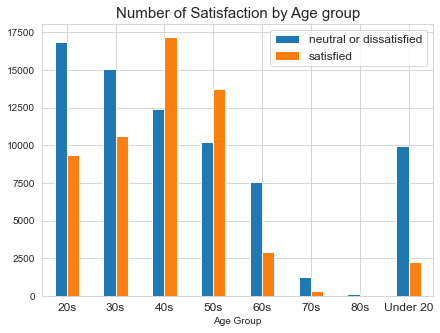

In [17]:
age_group_satisfaction_count.plot.bar(figsize=(7,5))
plt.title("Number of Satisfaction by Age group", fontsize=15)
plt.xticks(fontsize=12, rotation=0)
plt.legend(fontsize=12)
plt.show()

## Seat Class and Customer satisfaction

Is there strong relationship between seat class and customer satisfaction?

In [18]:
# Number of satisfaction grouped by seat Class 
class_satisfaction = all_df.groupby(["Class",'satisfaction'])['satisfaction'].count().unstack()

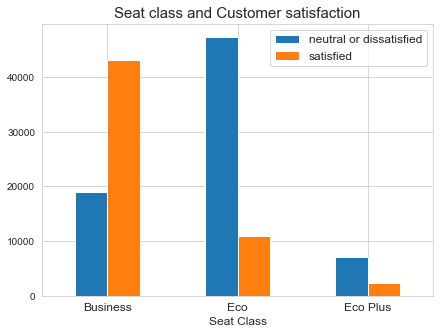

In [19]:
class_satisfaction.plot.bar(figsize=(7,5))
plt.title("Seat class and Customer satisfaction",fontsize=15)
plt.xlabel("Seat Class", fontsize=12)
plt.xticks(fontsize=12, rotation=0)
plt.legend(fontsize=12)
plt.show()

## Seat Class by Age group

In [20]:
age_group_class = all_df.groupby('Age Group')['Class'].value_counts().unstack()

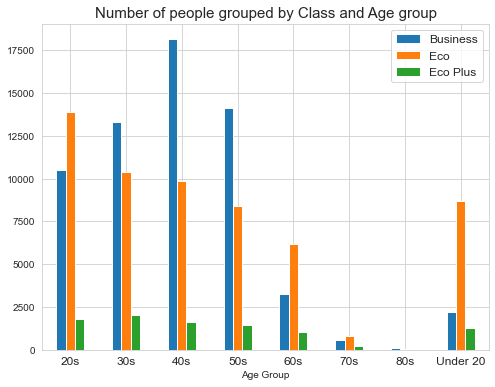

In [21]:
age_group_class.plot.bar(figsize=(8,6))
plt.title("Number of people grouped by Class and Age group",fontsize=15)
plt.xticks(fontsize=12, rotation=0)
plt.legend(fontsize=12)
plt.show()

## Type of Travel by Age group

In [22]:
age_group_trip_type = all_df.groupby('Age Group')['Type of Travel'].value_counts().unstack()

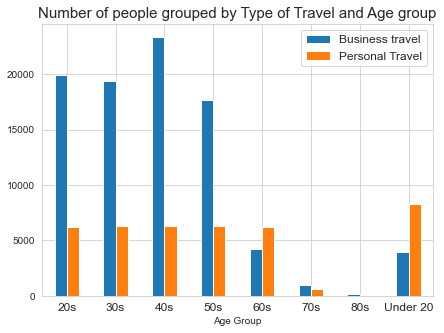

In [23]:
age_group_trip_type.plot.bar(figsize=(7,5))
plt.title("Number of people grouped by Type of Travel and Age group",fontsize=15)
plt.xticks(fontsize=12, rotation=0)
plt.legend(fontsize=12)
plt.show()

## Ratio of Satisfaction for Each customer type

In [24]:
# Value counts for Satisfaction for each Customer Type
customer_type_satisfaction = all_df.groupby('Customer Type')['satisfaction'].value_counts().unstack()
customer_type_satisfaction

satisfaction,neutral or dissatisfied,satisfied
Customer Type,,
Loyal Customer,55372,50728
disloyal Customer,18080,5700


In [25]:
type_1 = (customer_type_satisfaction.loc['Loyal Customer'][0]/customer_type_satisfaction.loc['Loyal Customer'].sum())*100

In [26]:
type_2 = (customer_type_satisfaction.loc['Loyal Customer'][1]/customer_type_satisfaction.loc['Loyal Customer'].sum())*100

In [27]:
type_3 = (customer_type_satisfaction.loc['disloyal Customer'][0]/customer_type_satisfaction.loc['disloyal Customer'].sum())*100

In [28]:
type_4 = (customer_type_satisfaction.loc['disloyal Customer'][1]/customer_type_satisfaction.loc['disloyal Customer'].sum())*100

In [42]:
# Conver the value to the ratio(%)
customer_type_satisfaction.iloc[0,0]  = type_1
customer_type_satisfaction.iloc[0,1]  = type_2
customer_type_satisfaction.iloc[1,0]  = type_3
customer_type_satisfaction.iloc[1,1]  = type_4
customer_type_satisfaction

satisfaction,neutral or dissatisfied,satisfied
Customer Type,,
Loyal Customer,52.188501,47.811499
disloyal Customer,76.030278,23.969722


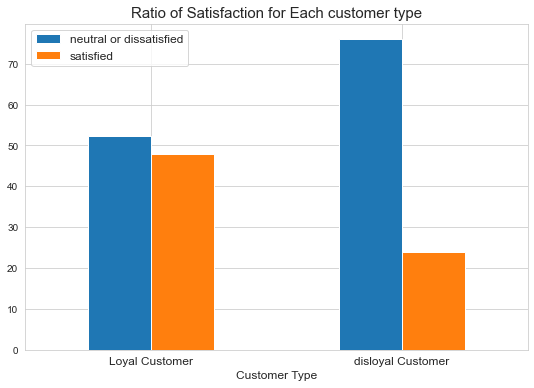

In [33]:
# Plot the data above
customer_type_satisfaction.plot(kind='bar', figsize=(9,6))
plt.xticks(rotation=0, fontsize=12)
plt.xlabel("Customer Type",fontsize=12)
plt.title("Ratio of Satisfaction for Each customer type", fontsize=15)
plt.legend(fontsize=12)
plt.show()

We can see that Loyal Customer has high number of satisfaction.

## Customer Type by Age group

In [34]:
age_group_customer_type = all_df.groupby('Age Group')['Customer Type'].value_counts().unstack()

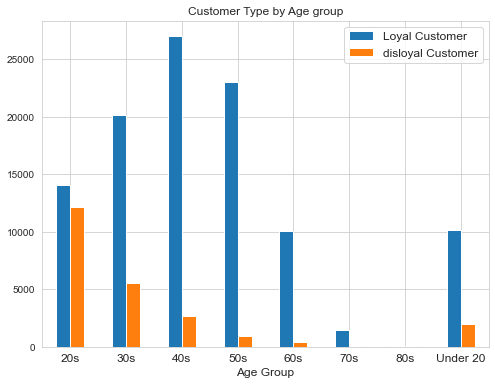

In [35]:
# plot customer type by age group
age_group_customer_type.plot(kind='bar', figsize=(8,6))
plt.title("Customer Type by Age group")
plt.xticks(fontsize=12, rotation=0)
plt.xlabel("Age Group", fontsize=12)
plt.legend(fontsize=12)
plt.show()

## Customer Type by Seat class

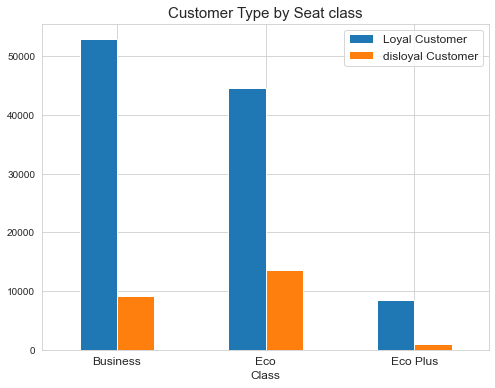

In [36]:
# plot customer type by seat class
age_group_class = all_df.groupby('Class')['Customer Type'].value_counts().unstack()
age_group_class.plot(kind='bar', figsize=(8,6))
plt.xticks(fontsize=12, rotation=0)
plt.xlabel("Class", fontsize=12)
plt.title("Customer Type by Seat class", fontsize=15)
plt.legend(fontsize=12)
plt.show()

## Explore data with Economy Seats

What should focus on economy seat data for improvement of Customer satisfaction? 
Obviously, We should investigate data with people who use economy seats.

In [37]:
# Filter the data only Eco seats.
eco_df = all_df[all_df['Class'] == 'Eco']
eco_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age Group
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,2,5,5,50,44.0,satisfied,50s
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,20s
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,4,2,4,0,20.0,satisfied,40s
5,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,...,4,3,1,1,2,5,0,0.0,satisfied,Under 20
8,Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,2,...,2,2,5,3,3,5,1,0.0,satisfied,40s


In [38]:
# Top 5 Lowest score items with Economy Seats
eco_df_mean =  pd.DataFrame(eco_df.mean().sort_values()[:5])
eco_df_mean.rename(columns={0:'score'}, inplace=True)

In [39]:
score = []
for i in eco_df_mean.score:
    i = round(i,2)
    score.append(i)
eco_df_mean.score = score 

In [40]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

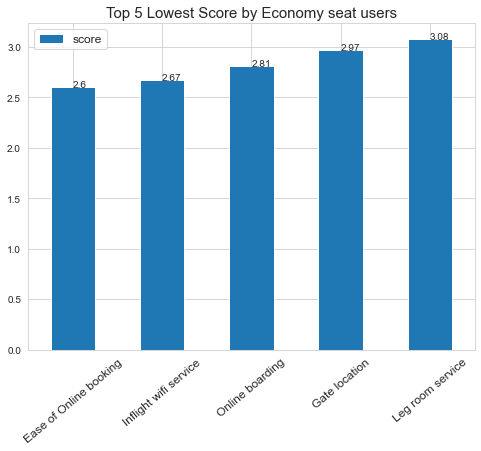

In [41]:
eco_df_mean.plot.bar(figsize=(8,6))
addlabels(eco_df_mean.index,eco_df_mean.score)
plt.title('Top 5 Lowest Score by Economy seat users', fontsize=15)
plt.xticks(rotation=40, fontsize=12)
plt.legend(fontsize=12)
plt.show()

# Summary & Insights 

1. Satisfied rate slightly increase if the Departure delay is shorter. However, Departure Delay does not have significant impact on Customer satisfaction.

2. High number of passengers are within range of 25 - 55 year old.

3. High number of 40s and 50s people use Business Class and most of them are satisfied. Also, most of the business class seats are for Business Trip. 

4. Age group 40s and 50s have high number of Loyal Customer. Moreover, Business class has high number of Loyal Customer.
    - Business Class users => 40s - 50s age group => Loyal Customers
    - Eco Class users => 20s age group => Disloyal Customers


5. In order to improve customer satisfaction, we can take a look at Internet service such as:
    - Online Booking
    - Inflight wifi service
    - Online Boarding

Because those are things that have the lowest score among Eco seat users. 